In [1]:
import geopandas as gpd
import requests
import io
import matplotlib.pyplot as plt

                                        geo_point_2d  id_gares  \
0  {'lon': 2.1690700494304567, 'lat': 48.80570415...      1200   
1  {'lon': 2.2631785657004593, 'lat': 48.82989015...       368   
2  {'lon': 2.21330231459666, 'lat': 48.9013110551...       579   
3  {'lon': 2.388566870479196, 'lat': 48.879493106...        93   
4  {'lon': 2.341376051143573, 'lat': 48.868654150...       104   

              nom_gares nom_so_gar nom_su_gar  id_ref_zdc  \
0  Viroflay Rive Droite       None       None      422420   
1     Issy-Val-de-Seine       None       None       71016   
2   Nanterre-Université       None       None       70956   
3              Botzaris       None       None       71906   
4                Bourse       None       None       73635   

                nom_zdc  id_ref_zda               nom_zda idrefliga  ...  \
0  Viroflay Rive Droite       46689  Viroflay Rive Droite    A02149  ...   
1     Issy Val de Seine      462357     Issy Val de Seine    A01192  ...   
2   Nant

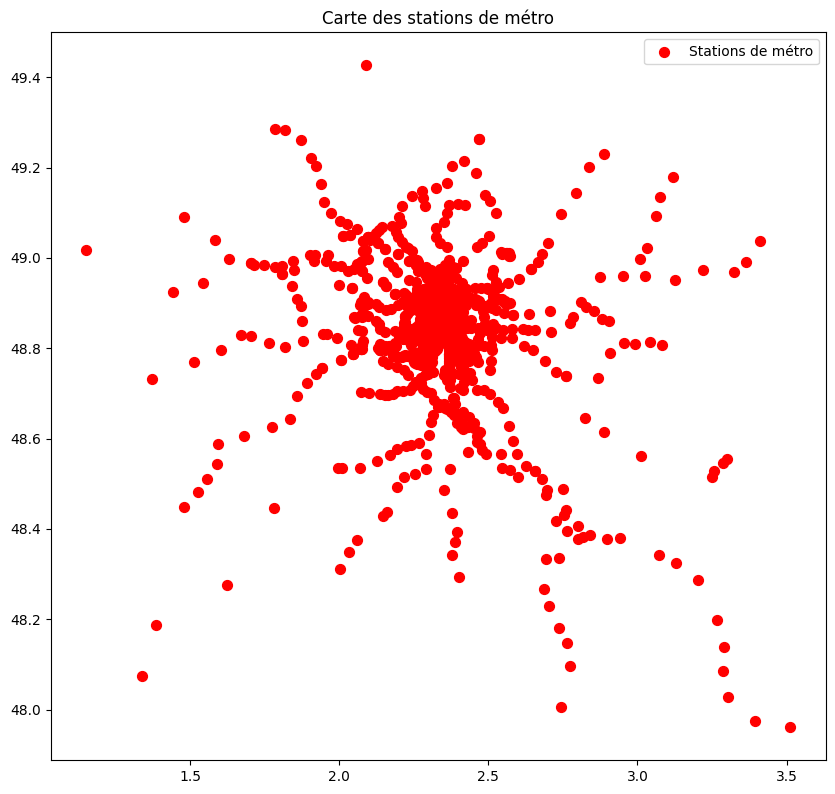

NameError: name 'folium' is not defined

In [2]:
# URL directe du fichier CSV sur GitHub
url = "https://data.iledefrance-mobilites.fr/api/explore/v2.1/catalog/datasets/emplacement-des-gares-idf/exports/geojson?lang=fr&timezone=Europe%2FBerlin"
# Téléchargement du contenu du fichier
response = requests.get(url)

# Vérification de la réponse
if response.status_code == 200:
    # Lecture du contenu en utilisant StringIO pour traiter les données en mémoire
    data = io.StringIO(response.content.decode('utf-8'))
    
    # Charger les données CSV dans GeoPandas
    gdf = gpd.read_file(data, delimiter=';')

    # Afficher les premières lignes du DataFrame pour vérifier que les données sont correctement chargées
    print(gdf.head())

    # Création d'une carte
    fig, ax = plt.subplots(figsize=(10, 10))

    # Affichage des données géographiques sur la carte
    gdf.plot(ax=ax, marker='o', color='red', markersize=50, label='Stations de métro')

    # Ajout d'une légende et d'un titre
    plt.legend()
    plt.title('Carte des stations de métro')

    # Affichage de la carte
    plt.show()
else:
    print("Échec du téléchargement du fichier.")

# Carte interactive qui s'ouvre en HTML
# URL des données
url = "https://data.iledefrance-mobilites.fr/api/explore/v2.1/catalog/datasets/emplacement-des-gares-idf/exports/geojson?lang=fr&timezone=Europe%2FBerlin"

# Téléchargement des données depuis l'URL
response = requests.get(url)

# Vérification du statut de la requête
if response.status_code == 200:
    # Créer une carte
    m = folium.Map(location=[48.8566, 2.3522], zoom_start=10)  # Centre la carte sur Paris

    # Charger les données dans un DataFrame pandas
    data = response.json()
    for feature in data['features']:
        properties = feature['properties']
        lon, lat = feature['geometry']['coordinates']
        nom_gares = properties.get('nom_gares', 'Nom non disponible')
        
        # Ajouter un marqueur pour chaque gare sur la carte
        folium.Marker(location=[lat, lon], popup=nom_gares).add_to(m)

    # Afficher la carte
    m.save('carte_gares_idf.html')  # Sauvegarder la carte en HTML
    m
else:
    print("La requête a échoué.")